In [73]:
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize


 
# Define a function to get info from the FPL API and save to the specified file_path
# It might be a good idea to navigate to the link in a browser to get an idea of what the data looks like
def get_json(file_path):
    r = requests.get('https://fantasy.premierleague.com/drf/bootstrap')
    jsonResponse = r.json()
    with open(file_path, 'w') as outfile:
        json.dump(jsonResponse, outfile)
 
# Run the function and choose where to save the json file
get_json(r'D:\fpl.json')
 
# Open the json file and print a list of the keys
with open(r'D:\fpl.json') as json_data:
    d = json.load(json_data)
    print(list(d.keys()))

# See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html
df = json_normalize(d['elements'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head())

['elements', 'total-players', 'player', 'element_types', 'watched', 'next-event', 'phases', 'stats', 'game-settings', 'current-event', 'teams', 'stats_options', 'last-entry-event', 'entry', 'next_event_fixtures', 'events']
Columns:
 ['assists', 'bonus', 'bps', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id', 'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in', 'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals', 'penalties_missed', 'penalties_saved', 'photo', 'points_per_game', 'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points', 'transfers_in', 'transfers_in_eve

In [77]:
df = json_normalize(d['elements'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df['id'])

print (d['current-event'])

Columns:
 ['assists', 'bonus', 'bps', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id', 'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in', 'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals', 'penalties_missed', 'penalties_saved', 'photo', 'points_per_game', 'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'yellow_cards'] 

Dataframe Head:
 0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8       10
9 

In [18]:

# The (not so) secret sauce (see https://www.premierleague.com/news/106533)
df = json_normalize(d['game-settings'])
print('Columns:\n', list(df), '\n')

Columns:
 ['element_type.1.bps_clean_sheets', 'element_type.1.bps_goals_scored', 'element_type.1.scoring_clean_sheets', 'element_type.1.scoring_goals_conceded', 'element_type.1.scoring_goals_scored', 'element_type.1.squad_max_play', 'element_type.1.squad_min_play', 'element_type.1.squad_select', 'element_type.1.sub_positions_locked', 'element_type.1.ui_shirt_specific', 'element_type.2.bps_clean_sheets', 'element_type.2.bps_goals_scored', 'element_type.2.scoring_clean_sheets', 'element_type.2.scoring_goals_conceded', 'element_type.2.scoring_goals_scored', 'element_type.2.squad_max_play', 'element_type.2.squad_min_play', 'element_type.2.squad_select', 'element_type.3.bps_clean_sheets', 'element_type.3.bps_goals_scored', 'element_type.3.scoring_clean_sheets', 'element_type.3.scoring_goals_conceded', 'element_type.3.scoring_goals_scored', 'element_type.3.squad_max_play', 'element_type.3.squad_min_play', 'element_type.3.squad_select', 'element_type.4.bps_clean_sheets', 'element_type.4.bps_g

In [49]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/leagues-classic-standings/231600').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['standings'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(100))



Keys:
 ['new_entries', 'league', 'standings', 'update_status'] 

Columns:
 ['has_next', 'number', 'results'] 

Dataframe Head:
    has_next  number                                            results
0     False       1  [{'id': 5239110, 'entry_name': '99 Fred Balloo...


In [39]:
# See json_normalize documentation for further info
df = json_normalize(d['standings'], 'results')
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(100))

Columns:
 ['entry', 'entry_name', 'event_total', 'id', 'last_rank', 'league', 'movement', 'own_entry', 'player_name', 'rank', 'rank_sort', 'start_event', 'stop_event', 'total'] 

Dataframe Head:
       entry            entry_name  event_total        id  last_rank  league  \
0    447289      99 Fred Balloons            0   5239110          1  231600   
1   1309202     Relegation Rovers            0   6735399          2  231600   
2   2766779  Good Klopp Bad Klopp            0  15284960          3  231600   
3   2275981    Game on the Throne            0  12591971          4  231600   
4   2305266       Que Salah Salah            0  12483392          5  231600   
5    159282      Tequila Magic Fc            0   5239108          6  231600   
6    109718                 PEA14            0   5239107          7  231600   
7   1312341        Bobby Firminho            0   6751222          8  231600   
8    468015            Dream Team            0   5239112          9  231600   
9   1680664   

In [52]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/element-summary/253').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['history'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df['total_points'])

Keys:
 ['history_past', 'fixtures_summary', 'explain', 'history_summary', 'fixtures', 'history'] 

Columns:
 ['assists', 'attempted_passes', 'big_chances_created', 'big_chances_missed', 'bonus', 'bps', 'clean_sheets', 'clearances_blocks_interceptions', 'completed_passes', 'creativity', 'dribbles', 'ea_index', 'element', 'errors_leading_to_goal', 'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded', 'goals_scored', 'ict_index', 'id', 'influence', 'key_passes', 'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out', 'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed', 'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance', 'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals', 'yellow_cards'] 

Dataframe Head:
 0      8
1      9
2      8
3      

In [78]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/447289/event/1/picks').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['picks'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(100))


      

Keys:
 ['active_chip', 'automatic_subs', 'entry_history', 'event', 'picks'] 

Columns:
 ['element', 'is_captain', 'is_vice_captain', 'multiplier', 'position'] 

Dataframe Head:
     element  is_captain  is_vice_captain  multiplier  position
0        47       False            False           1         1
1       247       False            False           1         2
2        72       False            False           1         3
3       423       False            False           1         4
4       276       False            False           1         5
5       393       False            False           1         6
6       253        True            False           2         7
7       223       False            False           1         8
8       257       False             True           1         9
9        45       False            False           1        10
10      280       False            False           1        11
11      439       False            False           1        12
12 

In [13]:
d = json.loads(requests.get('https://fantasy.premierleague.com/drf/bootstrap').text)
print('Keys:\n', list(d.keys()), '\n')
df = json_normalize(d['elements'])
print('Columns:\n', list(df), '\n')
print('Dataframe Head:\n', df.head(10))


Keys:
 ['elements', 'total-players', 'player', 'element_types', 'watched', 'next-event', 'phases', 'stats', 'game-settings', 'current-event', 'teams', 'stats_options', 'last-entry-event', 'entry', 'next_event_fixtures', 'events'] 

Columns:
 ['assists', 'bonus', 'bps', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'clean_sheets', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'creativity', 'dreamteam_count', 'ea_index', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded', 'goals_scored', 'ict_index', 'id', 'in_dreamteam', 'influence', 'loaned_in', 'loaned_out', 'loans_in', 'loans_out', 'minutes', 'news', 'news_added', 'now_cost', 'own_goals', 'penalties_missed', 'penalties_saved', 'photo', 'points_per_game', 'red_cards', 'saves', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'threat', 'total_points', 'transfers_in', 'transfe

<Figure size 1440x864 with 0 Axes>

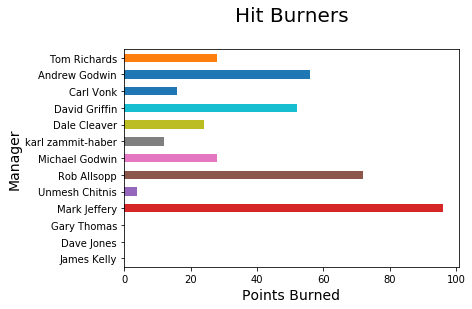

<Figure size 864x576 with 0 Axes>

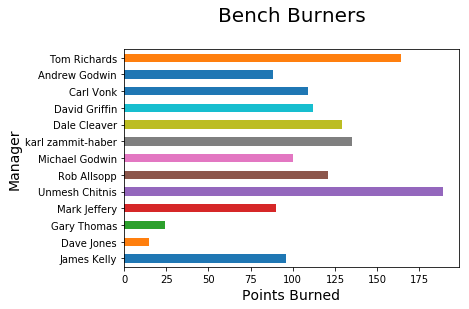

<Figure size 864x576 with 0 Axes>

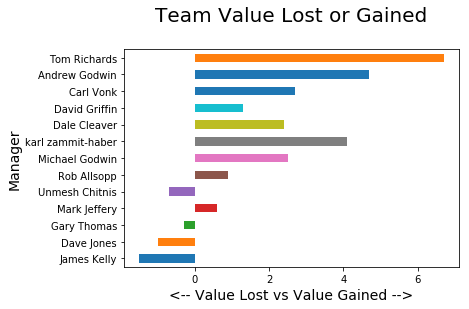

<Figure size 864x576 with 0 Axes>

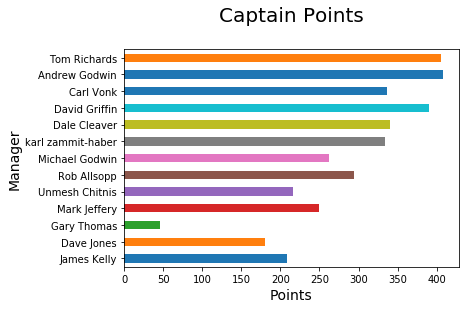

In [23]:
# Get the league, loop through the players, and call the history for each
# Then, loop through that and sum up the transfers :) 

# Need all this stuff
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Kick off by grabbing the bootstrap data - gameweek & player details are in here
json_bootstrap = json.loads(requests.get('https://fantasy.premierleague.com/drf/bootstrap').text)
# Find the latest gameweek
latest_gameweek= (json_bootstrap['current-event'])
df_elements = json_normalize(json_bootstrap['elements'])

# Loop round BH IT league
manager_summary=[]
json_league_standings = json.loads(requests.get('https://fantasy.premierleague.com/drf/leagues-classic-standings/231600').text)
df_league_standings = json_normalize(json_league_standings['standings'], 'results')
for ls_index,ls_row in (df_league_standings.iterrows()):
    transfer_cost=0
    points_left_on_the_bench=0
    value=0
    captain_points=0
    # Loop round history
    json_entry_history = \
    json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/' + str(ls_row['entry']) + '/history').text)
    df_entry_history = json_normalize(json_entry_history['history'])
    for ls_hist_index,ls_hist_row in (df_entry_history.iterrows()):
        transfer_cost = ls_hist_row['event_transfers_cost'] + transfer_cost
        points_left_on_the_bench = ls_hist_row['points_on_bench'] + points_left_on_the_bench
    value = ((ls_hist_row['value'] - 1000) / 10)
    # Now, loop round all gameweek picks, finding the captain
    # Then lookup in https://fantasy.premierleague.com/drf/element-summary/176/history for points for the captain
    for game_week in range (1, latest_gameweek+1):
        #print ('getting data')
        json_picks_for_gw = \
         json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/' \
                                + str(ls_row['entry']) \
                                + '/event/'
                                + str(game_week)
                                + '/picks').text)
        df_picks_for_gw = json_normalize(json_picks_for_gw['picks'])
        #print (ls_row['entry'])
        #print (game_week)
        # Find the captain
        df_captain=(df_picks_for_gw.loc[df_picks_for_gw.is_captain==True, 'element'])
        captain_id=int(df_captain.to_string(index=False))
        #print (df_elements.loc[df_elements.id==captain_id, 'first_name'])
        # Now look up his points for that gw
        json_gw_points = json.loads(requests.get('https://fantasy.premierleague.com/drf/element-summary/' + str(captain_id) ).text)
        df_gw_points = json_normalize(json_gw_points['history'])
        #print (df_gw_points)
        array=[game_week]
        df_round=df_gw_points.loc[df_gw_points['round'].isin(array),'total_points']
        points=int(df_round.to_string(index=False))
        captain_points=captain_points + (int(points)*2)

# d = json.loads(requests.get('https://fantasy.premierleague.com/drf/element-summary/253').text)

    manager_summary.append({'Owner': ls_row['player_name'], 'Points Burned': transfer_cost, \
                          'Points Left On The Bench': points_left_on_the_bench, \
                          'Rank': ls_row['rank'], 'Value': value, 'Captain Points':captain_points})
# Turn the dictionary to a dataframe
df_manager_summary=pd.DataFrame(manager_summary)
df_manager_summary_sorted=df_manager_summary.sort_values(by='Rank',ascending=False)
plt.figure(figsize=(20, 12))
fig=df_manager_summary_sorted.plot(kind='barh',x='Owner', y='Points Burned',legend=False)
fig.set_title('Hit Burners\n',fontsize=20)
fig.set_ylabel('Manager',fontsize=14)
fig.set_xlabel('Points Burned',fontsize=14)

x=plt.figure(figsize=(12, 8))
x=fig=df_manager_summary_sorted.plot(kind='barh',x='Owner', y='Points Left On The Bench',legend=False)
x=fig.set_title('Bench Burners\n',fontsize=20)
x=fig.set_ylabel('Manager',fontsize=14)
x=fig.set_xlabel('Points Burned',fontsize=14)

x=plt.figure(figsize=(12, 8))
x=fig=df_manager_summary_sorted.plot(kind='barh',x='Owner', y='Value',legend=False)
x=fig.set_title('Team Value Lost or Gained\n',fontsize=20)
x=fig.set_ylabel('Manager',fontsize=14)
x=fig.set_xlabel('<-- Value Lost vs Value Gained -->',fontsize=14)

x=plt.figure(figsize=(12, 8))
x=fig=df_manager_summary_sorted.plot(kind='barh',x='Owner', y='Captain Points',legend=False)
x=fig.set_title('Captain Points\n',fontsize=20)
x=fig.set_ylabel('Manager',fontsize=14)
x=fig.set_xlabel('Points',fontsize=14)


In [24]:
# Check the captain points by joining the data frames...

import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

# Kick off by grabbing the bootstrap data - gameweek & player details are in here
json_bootstrap = json.loads(requests.get('https://fantasy.premierleague.com/drf/bootstrap').text)
df_elements = json_normalize(json_bootstrap['elements'])
latest_gameweek= (json_bootstrap['current-event'])
print (df_elements.head(1))

json_league_standings = json.loads(requests.get('https://fantasy.premierleague.com/drf/leagues-classic-standings/231600').text)
df_league_standings = json_normalize(json_league_standings['standings'], 'results')
print (df_league_standings.head(1))

#json.loads(requests.get('https://fantasy.premierleague.com/drf/entry/' + str(ls_row['entry']) + '/history').text)
#df_entry_history = json_normalize(json_entry_history['history'])

Test



   assists  bonus  bps  chance_of_playing_next_round  \
0        0      3  130                         100.0   

   chance_of_playing_this_round  clean_sheets   code  cost_change_event  \
0                         100.0             1  11334                  0   

   cost_change_event_fall  cost_change_start  cost_change_start_fall  \
0                       0                 -2                       2   

  creativity  dreamteam_count  ea_index  element_type ep_next ep_this  \
0        0.0                0         0             1     1.0     0.0   

   event_points first_name form  goals_conceded  goals_scored ict_index  id  \
0             0       Petr  0.0               9             0      20.4   1   

   in_dreamteam influence  loaned_in  loaned_out  loans_in  loans_out  \
0         False     205.0          0           0         0          0   

   minutes news            news_added  now_cost  own_goals  penalties_missed  \
0      585       2018-09-29T17:31:14Z        48          0